# MLP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.array([[0,0,1,1],[0,1,0,1]])
y = np.array([[0,1,1,0]]) # XoR gate
# y = np.array([[1,0,0,1]]) # XnoR gate
no_x = 2
no_y = 1
no_h = 2
tot = x.shape[1]
lr = 0.1

np.random.seed(2)
w1 = np.random.rand(no_h,no_x)
w2 = np.random.rand(no_y,no_h)
losses = []

In [20]:
def sigmoid(z):
    z = 1/(1+np.exp(-z))
    return z

In [21]:
# Forward Propagation
def frwd_prop(w1,w2,x):
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    
    return z1,a1,z2,a2

In [22]:
# Backward propagation
def back_prop(tot, w1, w2, z1, a1, z2, a2, y):
    dz2 = a2 - y
    dw2 = np.dot(dz2, a1.T) / tot
    dz1 = np.dot(w2.T, dz2) * a1 * (1 - a1)
    dw1 = np.dot(dz1, x.T) / tot
    dw1 = np.reshape(dw1, w1.shape)
    
    dw2 = np.reshape(dw2, w2.shape)
    return dz2, dw2, dz1, dw1

Text(0, 0.5, 'Loss value')

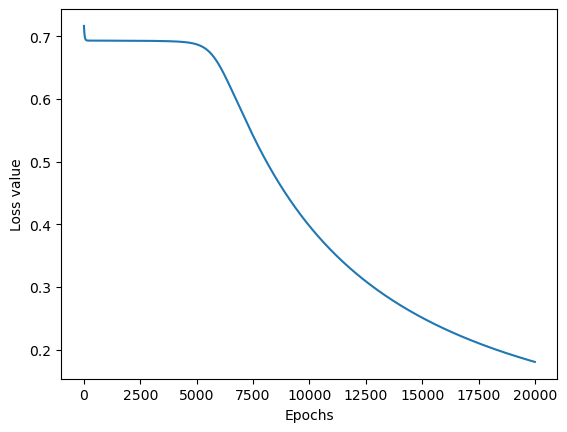

In [23]:
# loss value
epochs = 20000
for i in range(epochs):
    z1 , a1,z2,a2 = frwd_prop(w1,w2,x)
    loss = -(1/tot) * np.sum(y*np.log(a2) + (1-y)*np.log(1-a2))
    losses.append(loss)
    dz2, dw2, dz1, dw1 = back_prop(tot, w1, w2, z1, a1, z2, a2, y)
    w2 = w2 - lr*dw2
    w1 = w1 - lr*dw1

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss value")
    

In [24]:
# Defining Prediction method
def predict(w1, w2, input):
    z1, a1, z2, a2 = frwd_prop(w1, w2, mlp_test)
    a2 = np.squeeze(a2)
    if a2 >= 0.5:
        print("For input", [i[0] for i in input], "output is 1")
    else:
        print("For input", [i[0] for i in input], "output is 0")


In [25]:
# Calling Network Model
mlp_test = np.array([[1],[0]])
predict(w1, w2, mlp_test)
mlp_test = np.array([[0],[0]])
predict(w1, w2, mlp_test)
mlp_test = np.array([[0],[1]])
predict(w1, w2, mlp_test)
mlp_test = np.array([[1],[1]])
predict(w1, w2, mlp_test)


For input [1, 0] output is 1
For input [0, 0] output is 0
For input [0, 1] output is 1
For input [1, 1] output is 0
